### Data Storytelling Workshop - Goodreads Dataset

Goodreads is the world's largest site for readers and book recommendations. Their mission is to help people find and share books they love.

The point of this study is to look at the Goodreads dataset to understand how different parts of a book make it compelling for a reader, which may include the authors other works, how many languages the book has been translated into, and how other readers have rated it. 

##### Columns Description:
* bookID - Contains the unique ID for each book/series
* title - contains the titles of the books
* authors - contains the author of the particular book
* average_rating - the average rating of the books, as decided by the users
* ISBN - ISBN(10) number, tells the information about a book - such as edition and publisher
* ISBN 13 - The new format for ISBN, implemented in 2007. 13 digits
* language_code - Tells the language for the books
* Num_pages - Contains the number of pages for the book
* Ratings_count - Contains the number of ratings given for the book
* text_reviews_count - Has the count of reviews left by users

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [5]:
df = pd.read_csv('books.csv', on_bad_lines='skip')

In [6]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Most of the books are Harry Potter so maybe it would be nice to fix the authors names to only say the writer and not the illustrator as well. 

In [7]:
df['authors'].unique()

array(['J.K. Rowling/Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'C.S. Lewis/Ana Falcão Bastos',
       'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos',
       'William T. Vollmann/Larry McCaffery/Michael Hemmingson'],
      dtype=object)

In [8]:
df.replace(to_replace='J.K. Rowling/Mary GrandPré', value='J.K. Rowling', inplace=True)

In [32]:
df['title'].loc[df['authors']=='J.K. Rowling'].value_counts()

Harry Potter and the Half-Blood Prince (Harry Potter  #6)                                                             2
Harry Potter and the Chamber of Secrets (Harry Potter  #2)                                                            2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)                                                           2
Harry Potter and the Order of the Phoenix (Harry Potter  #5)                                                          1
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)                                                                1
Harry Potter Collection (Harry Potter  #1-6)                                                                          1
Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry    1
Harry Potter Y La Piedra Filosofal (Harry Potter  #1)                                                                 1
Harry Potter y la Orden del Fénix (Harry

In [10]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [12]:
#What is the average rating? 
#How many languages is one book published in? 
#Comapre different quantities together? 

In [13]:
corr_matrix = df.corr()

In [14]:
import seaborn as sn

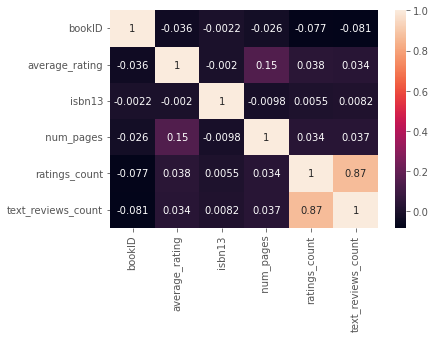

In [15]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

There is an 87% correlation between rating_count and text_reviews_count

<AxesSubplot:title={'center':'Books Published in Different Languages'}, xlabel='Language Codes', ylabel='Number of Books'>

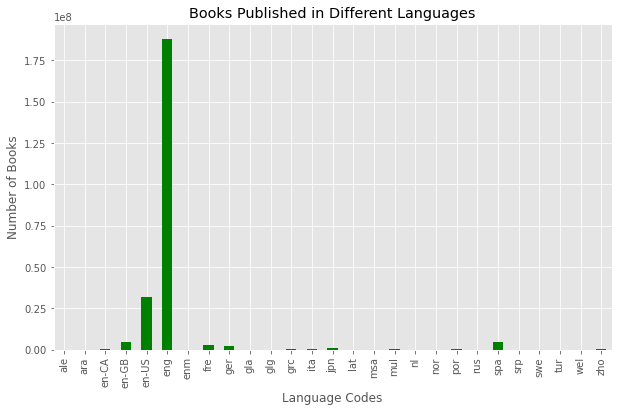

In [16]:
#Which books have the most translations in other languages? 
lang = df.groupby(['language_code'])['bookID'].sum()

lang.plot(kind='bar', color= 'green',title='Books Published in Different Languages',
               ylabel='Number of Books', xlabel='Language Codes',figsize=(10, 6))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Rating Count')

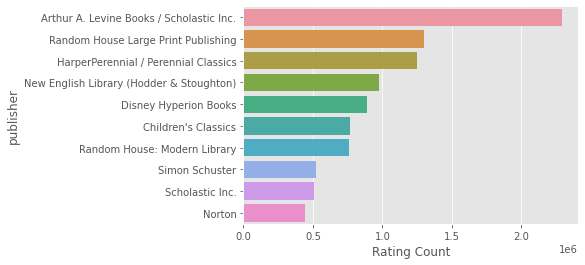

In [17]:
#Who are the popular publishers? 
publishers = pd.pivot_table(data=df,index='publisher')
publishers
publisher_sort = publishers.sort_values('ratings_count', ascending=False).head(10)
sn.barplot(publisher_sort['ratings_count'], publisher_sort.index)
plt.xlabel('Rating Count')

In [18]:
#What has this publisher worked on? 
df.loc[df['publisher'] == 'Arthur A. Levine Books / Scholastic Inc.']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


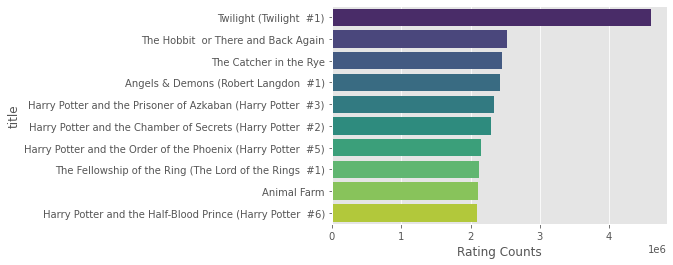

In [19]:
#What books are the top 10 most rated?
rating = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
sn.barplot(rating['ratings_count'], rating.index,palette="viridis")
plt.xlabel('Rating Counts')
plt.show()

In [20]:
#Which authors have the most books? 
df['authors'].value_counts().head(10)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
James Patterson     23
Name: authors, dtype: int64

In [21]:
#What I want is the book that has been printed in the most languages?
lang_book = df.groupby(['language_code'])['title'].size()
lang_book

language_code
ale         1
ara         1
en-CA       7
en-GB     214
en-US    1408
eng      8908
enm         3
fre       144
ger        99
gla         1
glg         1
grc        11
ita         5
jpn        46
lat         3
msa         1
mul        19
nl          1
nor         1
por        10
rus         2
spa       218
srp         1
swe         2
tur         1
wel         1
zho        14
Name: title, dtype: int64

In [22]:
df['title'].loc[df['language_code']=='zho']

1720                混血王子的背叛 (哈利波特  #6)
1721                  火盃的考驗 (哈利波特  #4)
4124                               戰廢品
4261                        魔戒首部曲：魔戒現身
4268                        魔戒二部曲：雙城奇謀
5419    野獸國 (漢聲精選世界最佳兒童圖畫書．心理成長類  #36)
8315                          鋼之鍊金術師 1
8316                          鋼之鍊金術師 6
8317                         鋼之鍊金術師 10
8318                          鋼之鍊金術師 4
8319                          鋼之鍊金術師 9
8320                          鋼之鍊金術師 5
8321                          鋼之鍊金術師 2
8322                          鋼之鍊金術師 7
Name: title, dtype: object

Lots of books have different titles in other languages.

In [24]:
df.loc[df['language_code']=='eng']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11103,45572,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,1855495090,9781855495098,eng,90,7,0,9/15/1995,BBC Audiobooks
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


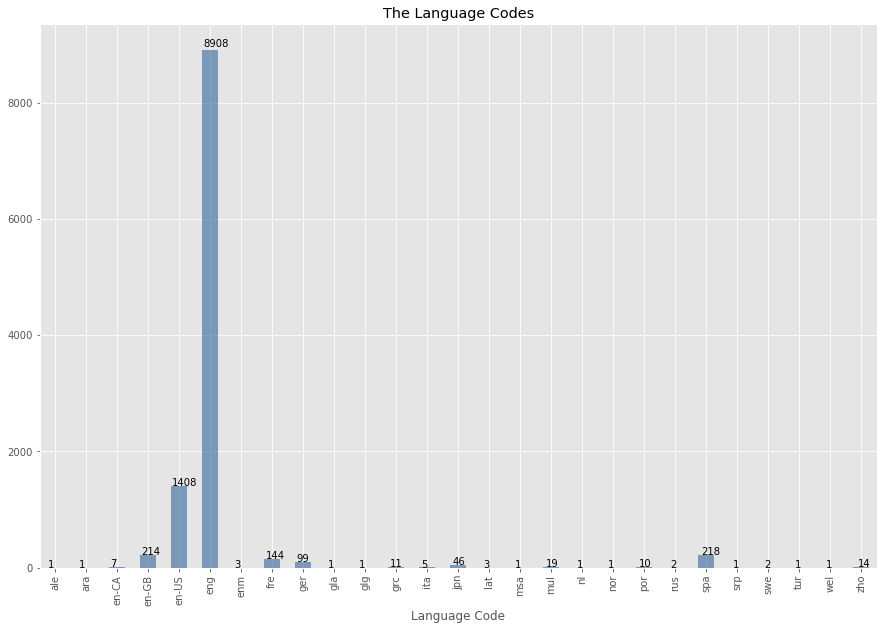

In [25]:
#lang_book is a groupby for various languages a book has been published in
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].size().plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.title('The Language Codes')
plt.xlabel('Language Code')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

I was interested in studying which book was printed in the most languages, but since many of the books printed in different languages are also titled in accoradance to that language this turned out to not be an ideal way of approaching the problem. 

In [26]:
#Looking at average ratings of books: 
df.average_rating.isnull().value_counts()

False    11123
Name: average_rating, dtype: int64

In [27]:
df.dropna(0, inplace=True)

/var/folders/30/6_p3qd654sq5h_s7nwrzyryw0000gn/T/ipykernel_4330/1549782735.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0, inplace=True)


<Figure size 1080x720 with 0 Axes>

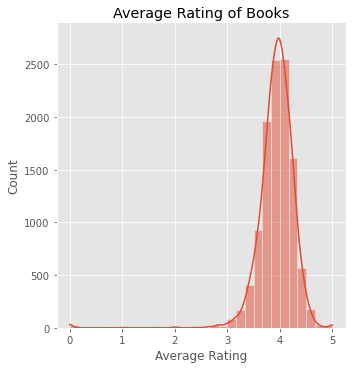

In [28]:
plt.figure(figsize=(15,10))
ax = df.average_rating.astype(float)
sn.displot(ax, bins=30, kde=True)
plt.xlabel('Average Rating')
plt.title('Average Rating of Books')
plt.show()

Majority of the books are rated at about 3.5-4.5

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


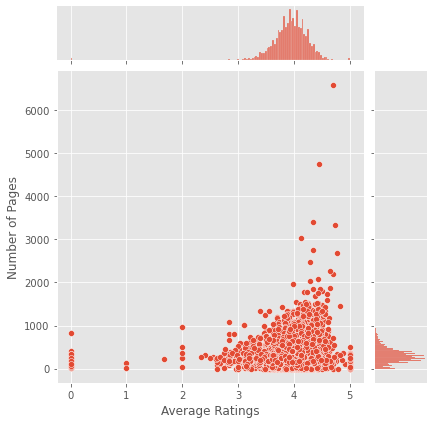

In [29]:
#Exploring the ratings the books have with the number of pages 
ax1 = df.average_rating.astype(float)
ax2 = df['  num_pages'].astype(float)
plot = sn.jointplot(ax1, ax2)
plot.set_axis_labels('Average Ratings', 'Number of Pages')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


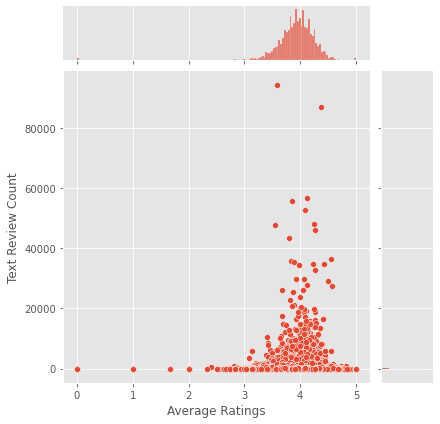

In [30]:
#Comparing other factors such as text_reviews_count with rating_count
ax1 = df.average_rating.astype(float)
ax2 = df['text_reviews_count'].astype(float)
plot = sn.jointplot(ax1, ax2)
plot.set_axis_labels('Average Ratings', 'Text Review Count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Text Review Count')

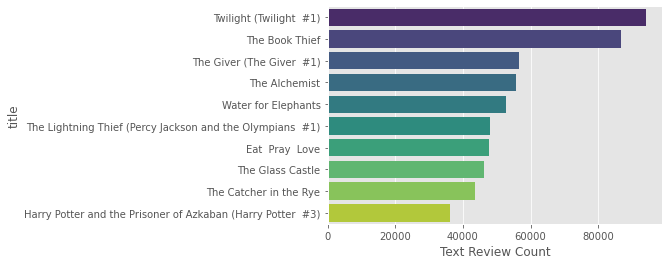

In [31]:
review_counts = df.sort_values('text_reviews_count', ascending=False).head(10).set_index('title')
sn.barplot(review_counts['text_reviews_count'], review_counts.index,palette="viridis")
plt.xlabel('Text Review Count')

It is interesting to see that based on the correlation matrix there seems to be an 87% relationship between rating counts and text review counts. Based on the bar graph above we notice that Twilight is the most highly rated and reviewed book. Could this one book impact what the data is suggesting to us that there is a greater correlation based on this outlier. 

#### Conclusion

People enjoy using Goodreads because it helps them organize their reading life and be part of a community of individuals who are passionate about books. Based on the data analysis, it can be concluded that while reviews are important, they do not necessarily have a direct correlation with the ranking of the books provided. For example Twilight was the highest rated book with the largest quantity of text reviews, but this may just be an outlier and doesn't necessarily mean that books with the most reviews or highest ratings will always be the most popular or well-received.

In the future, an area that I would like to explore more is how the ISBN columns may help understand books that are popular on a global scale.